In [18]:
import collections
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import netCDF4 as nc
import numpy as np

%matplotlib inline

In [5]:
ymd = collections.OrderedDict()
ymd['17dec16'] = '20161217'
ymd['22dec16'] = '20161222'
ymd['27dec16'] = '20161227'
ymd['01jan17'] = '20170101'
ymd['06jan17'] = '20170106'
ymd['11jan17'] = '20170111'
ymd['21jan17'] = '20170121'
ymd['26jan17'] = '20170126'
ymd['31jan17'] = '20170131'
ymd['05feb17'] = '20170205'
ymd['10feb17'] = '20170210'
ymd['15feb17'] = '20170215'
ymd['20feb17'] = '20170220'
ymd['25feb17'] = '20170225'
ymd['01mar17'] = '20170301'
ymd['06mar17'] = '20170306'
ymd['11mar17'] = '20170311'
ymd['16mar17'] = '20170316'
ymd['21mar17'] = '20170321'
ymd['26mar17'] = '20170326'
ymd['31mar17'] = '20170331'
ymd['05apr17'] = '20170405'
ymd['10apr17'] = '20170410'
ymd['15apr17'] = '20170415'
ymd['20apr17'] = '20170420'
ymd['25apr17'] = '20170425'
original = '/results/SalishSea/nowcast-green/'
new_hindcast = '/results/SalishSea/hindcast/'
basefilename = 'SalishSea_1d_'

In [20]:
ymd = collections.OrderedDict()
ymd['25aug15'] = '20150825'
ymd['01sep15'] = '20150901'
ymd['08sep15'] = '20150908'
ymd['15sep15'] = '20150915'
ymd['22sep15'] = '20150922'
ymd['29sep15'] = '20150929'
ymd['06oct15'] = '20151006'
original = '/results/SalishSea/nowcast-green/'
new_hindcast = '/results/SalishSea/hindcast/'
basefilename = 'SalishSea_1d_'

In [21]:
ymd = collections.OrderedDict()
ymd['31aug15'] = '20150831'
ymd['30sep15'] = '20150930'
ymd['31oct15'] = '20151031'
ymd['30nov15'] = '20151130'
ymd['31dec15'] = '20151231'
ymd['31jan16'] = '20160131'
ymd['29feb16'] = '20160229'
ymd['31mar16'] = '20160331'
ymd['30apr16'] = '20160430'
ymd['31may16'] = '20160531'
ymd['30jun16'] = '20160630'
ymd['31jul16'] = '20160731'
ymd['31aug16'] = '20160831'
ymd['30sep16'] = '20160930'
ymd['31oct16'] = '20161031'
ymd['30nov16'] = '20161130'
ymd['31dec16'] = '20161231'
ymd['31jan17'] = '20170131'
original = '/results/SalishSea/nowcast-green/'
new_hindcast = '/results/SalishSea/hindcast/'
basefilename = 'SalishSea_1d_'

/results/SalishSea/nowcast-green/17dec16/SalishSea_1d_20161217_20161217_grid_T.nc


/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/numpy/ma/core.py:6457: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


0.247784700608
-0.000479939577327
/results/SalishSea/nowcast-green/22dec16/SalishSea_1d_20161222_20161222_grid_T.nc
0.29522869196
0.00151486904438
/results/SalishSea/nowcast-green/27dec16/SalishSea_1d_20161227_20161227_grid_T.nc
0.222329208955
0.00259521112083
/results/SalishSea/nowcast-green/01jan17/SalishSea_1d_20170101_20170101_grid_T.nc
0.222795691914
0.00314542073588
/results/SalishSea/nowcast-green/06jan17/SalishSea_1d_20170106_20170106_grid_T.nc
0.222166582632
0.00384190675596
/results/SalishSea/nowcast-green/11jan17/SalishSea_1d_20170111_20170111_grid_T.nc
0.215754077169
0.00359620063769
/results/SalishSea/nowcast-green/21jan17/SalishSea_1d_20170121_20170121_grid_T.nc
0.266836827501
0.00601262948569
/results/SalishSea/nowcast-green/26jan17/SalishSea_1d_20170126_20170126_grid_T.nc
0.250101418351
0.00628749527948
/results/SalishSea/nowcast-green/31jan17/SalishSea_1d_20170131_20170131_grid_T.nc
0.243610852375
0.00653798167243
/results/SalishSea/nowcast-green/05feb17/SalishSea_1d_2

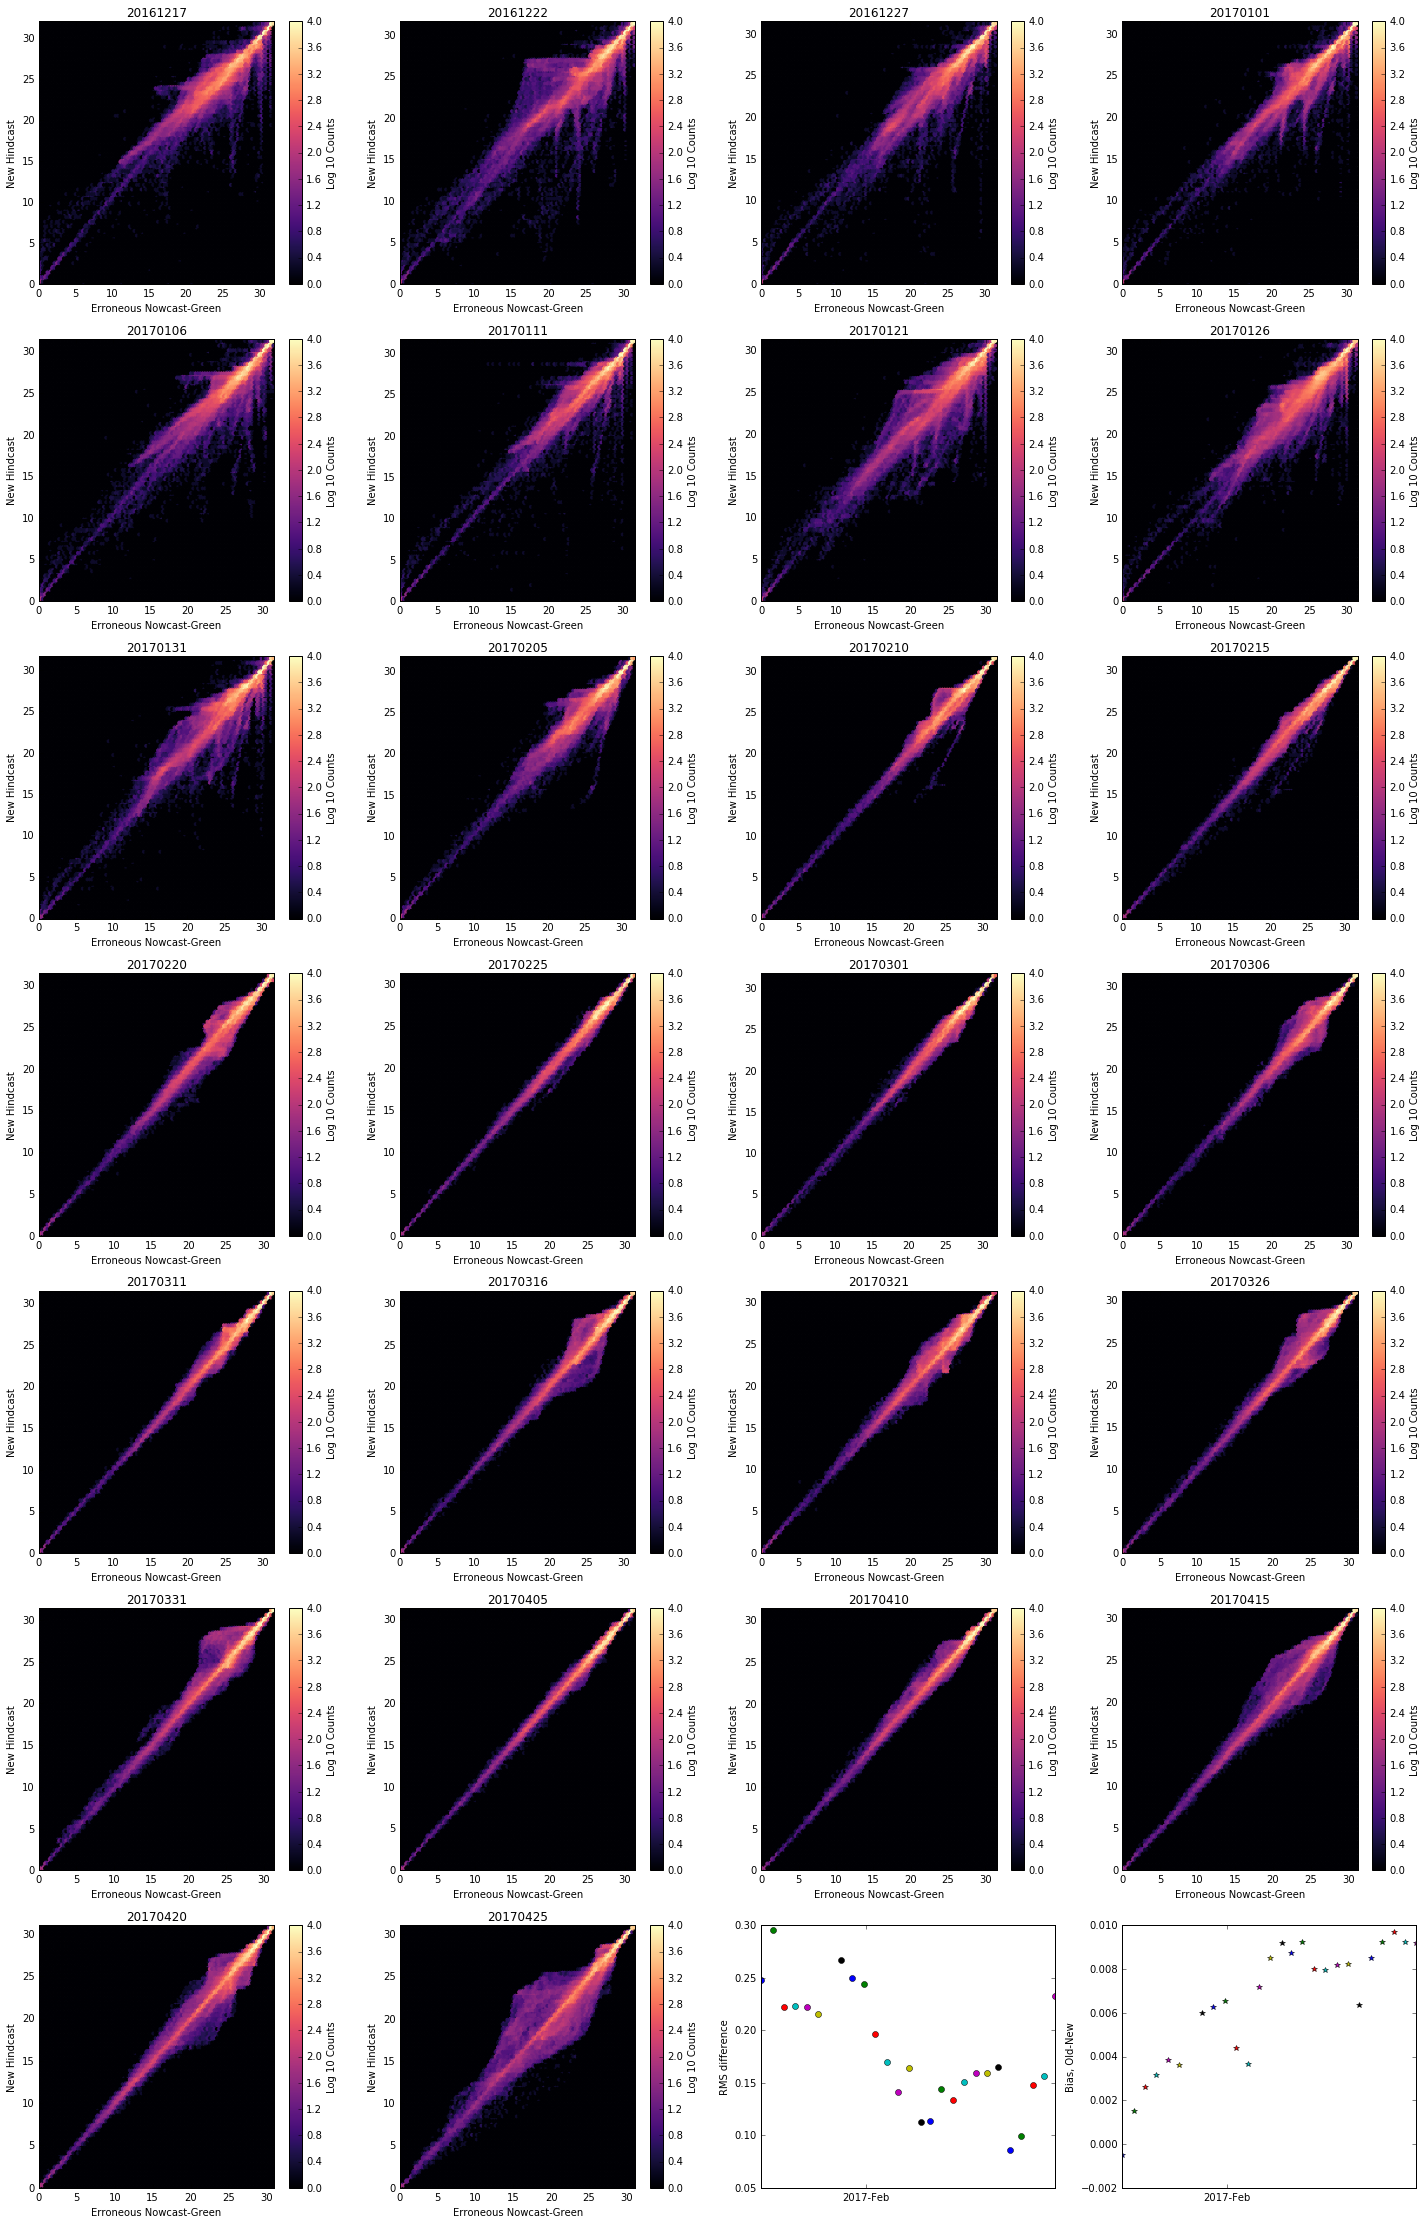

In [6]:
lastrow = 6
fig, axs = plt.subplots(lastrow+1, 4, figsize=(20, 31))
months = mdates.MonthLocator(interval=3)
monthsFmt = mdates.DateFormatter('%Y-%b')
count = 0
scount = 0
for date in ymd:
    filename = original + date + '/' + basefilename + ymd[date] + '_' + ymd[
        date] + '_grid_T.nc'
    print(filename)
    data_orig = nc.Dataset(filename)
    filename = new_hindcast + date + '/' + basefilename + ymd[
        date] + '_' + ymd[date] + '_grid_T.nc'
    data_new = nc.Dataset(filename)
    S1 = data_orig['vosaline'][0]
    S2 = data_new['vosaline'][0]
    k0 = 0
    k1 = 5
    mesh = axs[scount, count].hexbin(np.ndarray.flatten(S1[k0:k1]), np.ndarray.flatten(S2[k0:k1]), bins='log', 
                                     cmap='magma', vmax=4)
    cb = fig.colorbar(mesh, ax=axs[scount, count])
    cb.set_label('Log 10 Counts')
    axs[scount, count].set_title(ymd[date])
    axs[scount, count].set_xlabel('Erroneous Nowcast-Green')
    axs[scount, count].set_ylabel('New Hindcast')
    if count < 3:
        count = count + 1
    else:
        scount = scount + 1
        count = 0
    
    dt = datetime.datetime.strptime(ymd[date], '%Y%m%d')
    rms = np.sqrt(np.mean((S1-S2)**2))
    print(rms)
    axs[lastrow, 2].plot(dt, rms, 'o')
    axs[lastrow, 2].xaxis.set_major_locator(months)
    axs[lastrow, 2].xaxis.set_major_formatter(monthsFmt)
    axs[lastrow, 2].set_ylabel('RMS difference')
    axs[lastrow, 3].set_ylabel('Bias, Old-New')
    bias = np.mean(S1)-np.mean(S2)
    print(bias)
    axs[lastrow, 3].plot(dt, bias, '*')
    axs[lastrow, 3].xaxis.set_major_locator(months)
    axs[lastrow, 3].xaxis.set_major_formatter(monthsFmt)
plt.tight_layout()

# New Hindcast Versus Old Hindcast: Top 5 depths